#### `Q-1:` Write a program to create an empty series.

In [5]:
import numpy as np
import pandas as pd

pd.Series([], dtype = 'int', name = "empty_series", index = [])

Series([], Name: empty_series, dtype: int32)

#### `Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [6]:
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series([1,2,3,4,5])

print(s1 + s2)
print(s1 - s2)
print(s1 * s2)
print(s1 / s2)

0     2
1     4
2     6
3     8
4    10
dtype: int64
0    0
1    0
2    0
3    0
4    0
dtype: int64
0     1
1     4
2     9
3    16
4    25
dtype: int64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64


#### `Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]

In [7]:
s1 = pd.Series([2,4,6,8,10])
s2 = pd.Series([1,3,5,7,10])

# Comparison
print(s1 == s2)
print(s1 < s2)
print(s1 > s2)

0    False
1    False
2    False
3    False
4     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool
0     True
1     True
2     True
3     True
4    False
dtype: bool


#### `Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```Python
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [9]:
s = pd.Series([1,2,'Python', 2.0, True, 100])
s.apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

0       1
1       2
2     NaN
3     2.0
4    True
5     100
dtype: object

### Below questions are based on this data.

#### `Q-6` Find top 10 most run getter from the series.

In [15]:
df = pd.read_csv('data.csv')
df.set_index('batter', inplace = True)
df.head()

,batsman_run
batter,
A Ashish Reddy,280
A Badoni,161
A Chandila,4
A Chopra,53
A Choudhary,25


In [16]:
df.sort_values(by = 'batsman_run', ascending = False, ignore_index = False, na_position = 'last', inplace = True)
df.head(10)

,batsman_run
batter,
V Kohli,6634
S Dhawan,6244
DA Warner,5883
RG Sharma,5881
SK Raina,5536
AB de Villiers,5181
CH Gayle,4997
MS Dhoni,4978
RV Uthappa,4954


#### `Q-7` No of players having runs above 3000

In [19]:
(df['batsman_run'] > 3000).sum(axis = 0)

20

#### `Q-8` No of players having runs above mean value?

In [20]:
(df['batsman_run'] > df['batsman_run'].mean(axis = 0)).sum(axis = 0)

128

### Below questions are based on this items.

In [38]:
df = pd.read_csv('items.csv')
df.set_index('item_name', inplace = True)
df.head()

,item_price
item_name,
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98


In [39]:
# Show no of nan values
df['item_price'].isnull().sum()

50

In [41]:
# Removing nan values
new_df = df.dropna()

# Item price is given in $, so convert it to rupees without currency symbol.
new_df.loc[:, 'item_price'] = new_df.loc[:, 'item_price'].apply(lambda x: float(x[1:].strip()) * 92)
new_df.head()

,item_price
item_name,
Chips and Fresh Tomato Salsa,219.88
Izze,311.88
Nantucket Nectar,311.88
Chips and Tomatillo-Green Chili Salsa,219.88
Chicken Bowl,1562.16


In [42]:
# Fill nan with mean of the series
df.fillna(value = new_df['item_price'].mean(), inplace = True)

<Axes: >

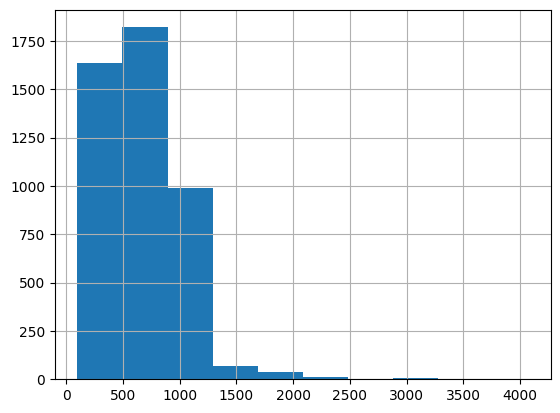

In [43]:
# Plot Histogram on price with bin size 50
new_df['item_price'].hist(bins = 10)

In [ ]:
# Find 30th and 6th percentile value
new_df.quantile(q=0.3)
new_df.quantile(q=0.06)

item_price    115.0
Name: 0.06, dtype: object

In [ ]:
# No of items price lies between [1000 to 2000]
new_df[(new_df>1000) & (new_df<2000)]

,item_price
item_name,
Chips and Fresh Tomato Salsa,NaN
Izze,NaN
Nantucket Nectar,NaN
Chips and Tomatillo-Green Chili Salsa,NaN
Chicken Bowl,1562.16
...,...
Steak Burrito,1081.0
Steak Burrito,1081.0
Chicken Salad Bowl,1035.0
